In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from dfode_kit.df_interface.flame_configurations import OneDFreelyPropagatingFlameConfig
from dfode_kit.df_interface.oneDflame_setup import setup_one_d_flame_case

config_dict = {
    "mechanism": "/home/xk/Software/5_dfode_kit/Burke2012_s9r23.yaml",
    "T0": 300,
    "p0": 101325,
    "fuel": "H2:1",
    "oxidizer": "O2:0.21,N2:0.79",
    "eq_ratio": 1.0,
}

config = OneDFreelyPropagatingFlameConfig(**config_dict)

# Access the initialized attributes
print(config.dim_names)

['T', 'p', 'H', 'H2', 'O', 'OH', 'H2O', 'O2', 'HO2', 'H2O2', 'N2']


In [3]:
settings = {
    "sim_time_step": 1e-6,
    "sim_write_interval": 1e-5,
    "num_output_steps": 100,
}

config.update_config(settings)

Solving premixed flame...
Laminar Flame Speed      :   2.3489328863 m/s
Laminar Flame Thickness  :   0.0003694362 m


In [4]:
setup_one_d_flame_case(config, '.')

One-dimensional flame case setup completed at: /home/xk/Software/5_dfode_kit/DFODE-kit/cases/oneD_freely_propagating_flame


In [5]:
laminar_flame_speed = config.flame_speed
laminar_flame_thickness = config.flame_thickness
final_flame = config.flame

print(config.flame_speed)
print(config.flame_thickness)

2.3489328862659917
0.00036943619260115633


In [6]:
def extract_flame_data(final_flame):
    collected_data = final_flame.collect_data(cols=['grid', 'T', 'Y', 'heat_release_rate'])
    z = collected_data['grid']
    T = collected_data['T']
    Y = collected_data['Y']
    heat_release_rate = collected_data['heat_release_rate']
    return z,T,Y,heat_release_rate

def plot_flame_data(final_flame):
    z,T,Y,heat_release_rate=extract_flame_data(final_flame)
    fig, ax = plt.subplots(2, 1, figsize=(12, 6), dpi=600)
    # Plot temperature and heat release rate if provided
    ax[0].plot(z, T, label='Temperature (K)')
    ax1 = ax[0].twinx()
    ax1.plot(z, heat_release_rate, label='Heat Release Rate [W/m³]', color='C1', linestyle='--')
    ax[0].set_xlabel('Position (m)')
    ax[0].set_ylabel('Temperature (K)')
    ax[0].set_title('Flame Temperature Profile')
    ax[0].grid()
    ax[0].legend()

    # Plot species mass fractions if provided
    for i, species in enumerate(final_flame.species_names):
        ax[1].plot(z, Y[:, i] / np.max(Y[:, i]), label=species)
    ax[1].set_xlabel('Position (m)')
    ax[1].set_ylabel('Normalized Mass Fraction')
    ax[1].set_title('Flame Species Mass Fractions')
    ax[1].grid()
    ax[1].legend()
    plt.tight_layout()
    plt.show()
    return ax, ax1

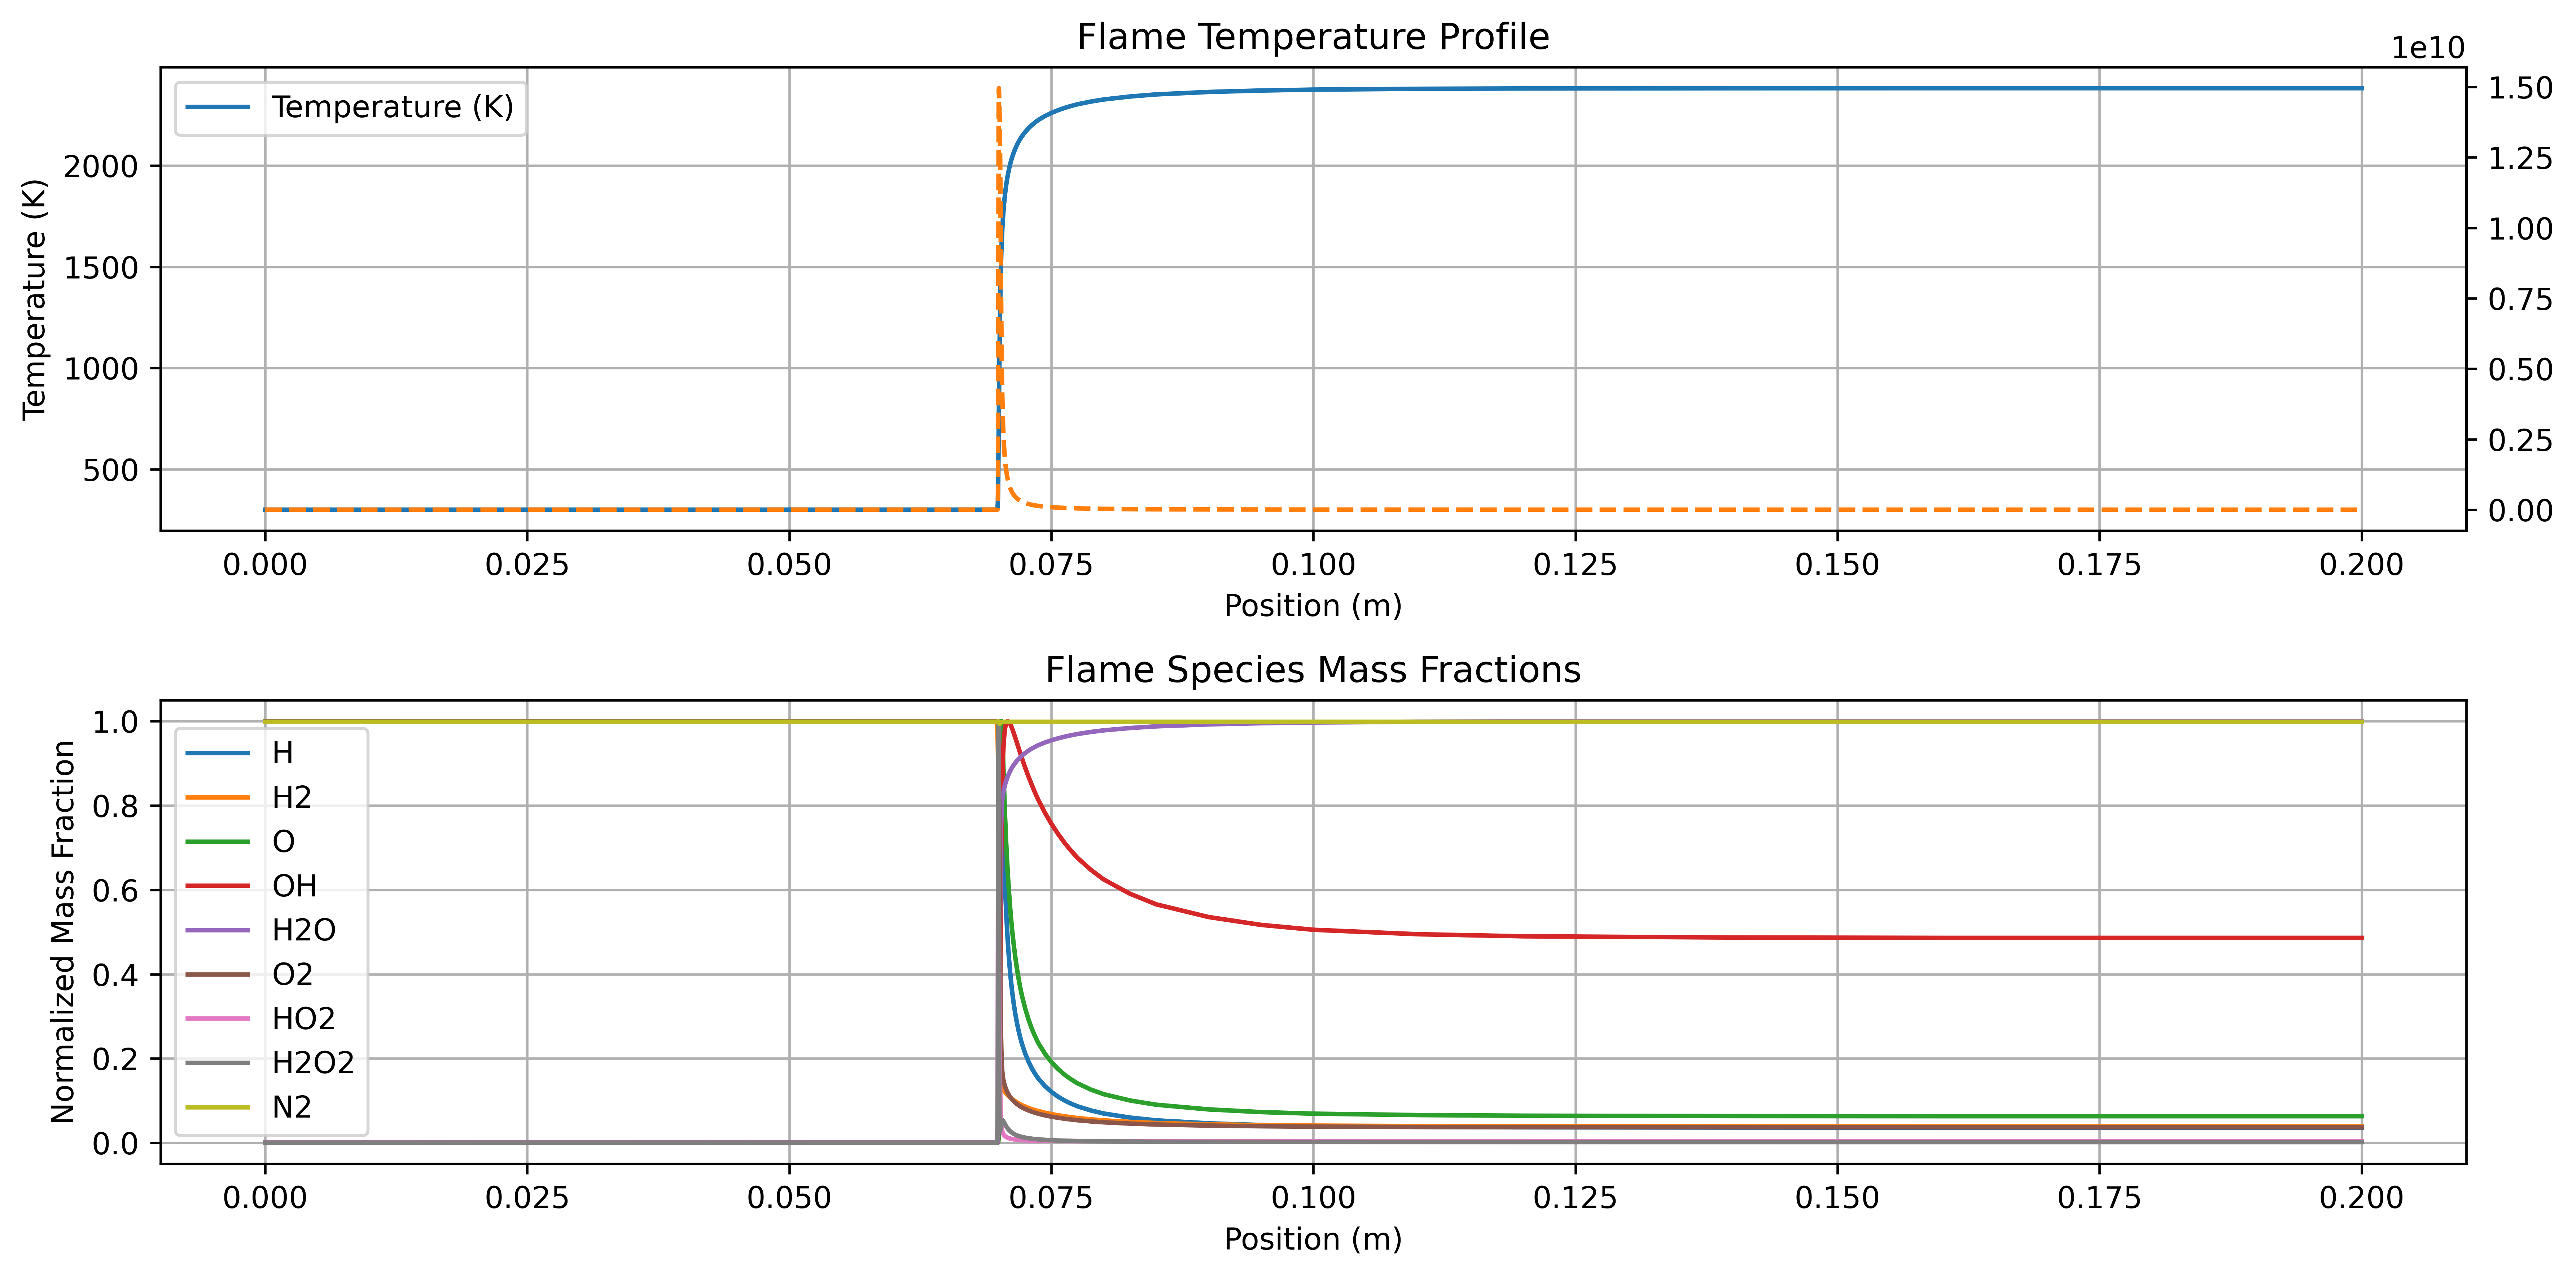

(array([<Axes: title={'center': 'Flame Temperature Profile'}, xlabel='Position (m)', ylabel='Temperature (K)'>,
        <Axes: title={'center': 'Flame Species Mass Fractions'}, xlabel='Position (m)', ylabel='Normalized Mass Fraction'>],
       dtype=object),
 <Axes: >)

In [7]:
plot_flame_data(final_flame)

In [8]:
# from dfode_kit.df_interface.sample_case import save_arrays_to_hdf5
# from dfode_kit.data_operations.h5_kit import load_and_print_hdf5_contents

# save_arrays_to_hdf5(
#     '/home/xk/Software/5_dfode_kit/DFODE-kit/cases/oneD_freely_propagating_flame',
#     config.mech_path,
#     '/home/xk/Software/5_dfode_kit/DFODE-kit/cases/oneD_freely_propagating_flame/flame_data.h5'
# )

# load_and_print_hdf5_contents('/home/xk/Software/5_dfode_kit/DFODE-kit/cases/oneD_freely_propagating_flame/flame_data.h5')